# Evolution Strategy

In this Jupyter Notebook, we explain and show a few use cases for the Evolution Strategy. First,
let's understand the problem behind this method.

## 1. Theory

The Evolution Strategy is based on a population that iteratively evolves based on the cost function.
The goal is eventually find a local (possibly global) minimum for the optimizing function in the
problem. The cost function is supposed to map a $\mathbb{R}^n$ space into $\mathbb{R}$.

In the beginning, we have a set of $\lambda$ points $x_0^1, \cdots, x_0^\lambda$ randomly
generated from a multivariate normal distribution with mean $m_0$ and covariance matrix $\Sigma_0$.
The default choices for the hyperparameters are $m_0 = (0, \cdots, 0)^T$ and $\Sigma_0 = I_n$
In each step, we select the best $\mu$ points from population based on the cost function

$$X_t = \left( \vec x_t^1, \cdots, \vec x_t^\mu \right)_{n \times \mu}$$

In the equation, the points $x_t$ from the step $t$ are supposed to be ordered based on the cost
function. Then, we update the mean and the covariance matrix in the algorithm based on the following
rules.

$$m_t = \frac{1}{\mu} \left( \vec x_t^1 + \cdots + \vec x_t^\mu \right) $$

$$\Sigma_t = \frac{1}{\mu} (X_t - \vec m_{t-1}) \cdot (X_t - \vec m_{t-1})^T$$

The idea is choosing a new mean and covariance matrix based on the best $\mu$ observations from the
population size. The algorithm stops after a specific number of iterations.

## 2. Code

### 2.1 The Ackley function

The following code generates an optimization for some test function. We are using
the [Ackley][1] test function, which is widely used in these problems for benchmarking.

[1]: https://en.wikipedia.org/wiki/Ackley_function

In [1]:
import numpy as np
from ape._typing import Array

def ackley(a: Array) -> float:
    x, y = a
    u = -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))
    v = -np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
    w = np.e + 20
    return u + v + w

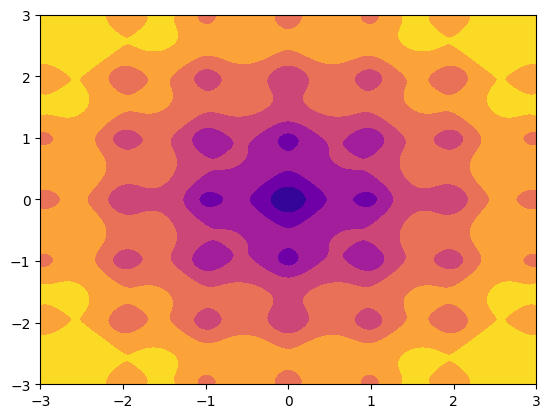

In [2]:
from typing import Callable
import matplotlib.pyplot as plt

def generate_mesh(func: Callable, min=-3, max=3, n=100):
    xlim = np.linspace(min, max, n)
    ylim = np.linspace(min, max, n)
    
    x,y = np.meshgrid(xlim, ylim)
    z = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            z[i,j] = func([x[i,j], y[i,j]])
    
    return x,y,z

x,y,z = generate_mesh(ackley, n=300)
plt.contourf(x, y, z, cmap='plasma')
plt.show()

### 2.2 Optimizing using ES

In [3]:
from ape.optimization import NaiveEvolutionStrategy

m0 = np.array([0,0])
s0 = np.identity(2)
es = NaiveEvolutionStrategy(μ=12, λ=24, n=2)
hist = es.optimize(f=ackley, iterations=100)

100%|██████████| 100/100 [00:00<00:00, 8400.03it/s]


In [4]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def animate(hist):
    plt.ioff()
    fig, ax = plt.subplots()

    x,y,z = generate_mesh(ackley, n=300)
    plt.contourf(x, y, z, cmap='plasma')

    line, = ax.plot(hist[0][:, 0], hist[0][:, 1], '.g')
    func = lambda i: line.set_data(hist[i][:, 0], hist[i][:, 1])
    animation = FuncAnimation(fig, func, interval=100, frames=len(hist), repeat=True)
    return HTML(animation.to_html5_video())

animate(hist)